<h2> Appling TSNE In  Amanzon Fine Food Reviews </h2>

<h2> Loading Data </h2>

In [71]:
%matplotlib inline

import numpy as np
import pandas as pd
import nltk
import string 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import pickle
import os
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from bs4 import BeautifulSoup

<h2> Reading Data </h2>

In [72]:
ar = pd.read_csv('Reviews.csv', nrows=1000)

def partition (x):
    if x < 3:
        return 'Negative'
    return 'Positive'

actualScore = ar['Score']
positivenegative = actualScore.map(partition)
ar['Score'] = positivenegative

ar.shape

(1000, 10)

In [73]:
ar.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,Positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,Negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,Positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


<h2> Data Cleaning:- Deduplication </h2>

In [74]:
sorted_data = ar.sort_values('ProductId', axis=0, ascending=True)
sorted_data.head(2000)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,Positive,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,Positive,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
252,253,B0002567IW,A1SSKFPX72MSMR,"Janna M. Sicard ""missjanna""",0,0,Negative,1344556800,Sad outcome,"Five minutes in, one tentacle was bitten off, ..."
187,188,B00029XIZI,A2S72TUJDQUBMH,Nadia,0,0,Positive,1236124800,Miracle,My Scotties were full of hot spots and when I ...
971,972,B0002XIB2Y,A1891H0TIXLDXA,Donald M. Bridges,1,2,Positive,1250294400,Pioneer Gravy is GREAT!,I have used Pioneer Gravy for a number of year...
970,971,B0002XIB2Y,A2DRQBOGCTC5HP,"TL ""TerryLea""",2,3,Positive,1191715200,Best white gravy !,Nothing easier. Nothing better. Even beats gra...
969,970,B0002XIB2Y,A1O3WOX0KBBV3W,MATHEW Geib,1,1,Positive,1260057600,YEEEEE HAWWW!,"I'm not from the south, but live in SoFla; whe..."
968,969,B0002XIB2Y,A3NV17B17PFB7G,Susan,3,3,Positive,1228176000,WONDERFUL gravy!,"This gravy mix is excellent ... except, don't ..."
411,412,B00061KYVI,A28RMYGO9RGA0K,marilyn,0,0,Positive,1328140800,french's roast'n bags,i love this product cant find it locally. Some...
412,413,B00061KYVI,A3JE18D4XD2PYF,pattymelt,0,0,Positive,1282521600,best roast ever,This is the best way to cook a roast. Our loc...


In [75]:
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"},keep='first',inplace=False)
final.shape

(998, 10)

In [76]:
(final['Id'].size*1.0)/(ar['Id'].size*1.0)*100

99.8

In [77]:
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]

In [78]:
print(final.shape)
final['Score'].value_counts()

(998, 10)


Positive    853
Negative    145
Name: Score, dtype: int64

<h2> Text Preprocessing </h2> 

In [79]:
# printing some random reviews
sent_0 = final['Text'].values[0]
print(sent_0)
print("="*50)

sent_1000 = final['Text'].values[200]
print(sent_1000)
print("="*50)

sent_1500 = final['Text'].values[500]
print(sent_1500)
print("="*50)

sent_4900 = final['Text'].values[800]
print(sent_4900)
print("="*50)

I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!
After reading some of the reviews, I got nervous and opened a bag from my recent order expecting the worst! No worries here. All bags are in great shape and expiration dates aren't until June. Chips, at least from the fi

In [80]:
# remove urls from text python: https://stackoverflow.com/a/40823105/4084039
sent_0 = re.sub(r"http\S+", "", sent_0)
sent_1000 = re.sub(r"http\S+", "", sent_1000)
sent_150 = re.sub(r"http\S+", "", sent_1500)
sent_4900 = re.sub(r"http\S+", "", sent_4900)

print(sent_0)

I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!


In [81]:
# https://stackoverflow.com/questions/16206380/python-beautifulsoup-how-to-remove-all-tags-from-an-element

soup = BeautifulSoup(sent_0, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_1000, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_1500, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_4900, 'lxml')
text = soup.get_text()
print(text)

I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.Thank you for the personal, incredible service!
After reading some of the reviews, I got nervous and opened a bag from my recent order expecting the worst! No worries here. All bags are in great shape and expiration dates aren't until June. Chips, at least from the first bag, taste like they are suppose

In [82]:
# https://stackoverflow.com/a/47091490/4084039
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [83]:
sent_1500 = decontracted(sent_1500)
print(sent_1500)
print("="*50)

Natural Balance Dry Dog Food Lamb Meal and Brown Rice Recipe did wonders for my Jack Russell. She has awful food allergy is and this food was our last hope because it was the last food we could find that did not have SOMETHING in it that she was allergic to. She has no problem eating it dry but normally I mix the Natural Balance Dry Lamb and Brown Rice with the Natural Balance Wet Lamb and Brown Rice.. she seems to like that better. We started feeding it to our other dog (a Bichon) too and she loves it. If your dog has allergy is or stomach issue.. or if you want your dog to eat better food-- this is it! You will see a difference in your pet.


In [84]:
#remove words with numbers python: https://stackoverflow.com/a/18082370/4084039
sent_0 = re.sub("\S*\d\S*", "", sent_0).strip()
print(sent_0)

I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!


In [85]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent_1500 = re.sub('[^A-Za-z0-9]+', ' ', sent_1500)
print(sent_1500)

Natural Balance Dry Dog Food Lamb Meal and Brown Rice Recipe did wonders for my Jack Russell She has awful food allergy is and this food was our last hope because it was the last food we could find that did not have SOMETHING in it that she was allergic to She has no problem eating it dry but normally I mix the Natural Balance Dry Lamb and Brown Rice with the Natural Balance Wet Lamb and Brown Rice she seems to like that better We started feeding it to our other dog a Bichon too and she loves it If your dog has allergy is or stomach issue or if you want your dog to eat better food this is it You will see a difference in your pet 


In [86]:
# https://gist.github.com/sebleier/554280

stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [87]:
# https://gist.github.com/sebleier/554280
preprocessed_reviews = []
for sentance in tqdm(final['Text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
   
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

100%|███████████████████████████████████████████████████████████████████████████████| 998/998 [00:01<00:00, 765.92it/s]


In [88]:
preprocessed_reviews[800]

u'pretty good product taste not best definitely not worse either gives pretty smooth energetic kick'

<h2> Featurization </h2>

<h2> Bag Of Words(BOW) </h2>

In [89]:
count_vect = CountVectorizer() 
count_vect.fit(preprocessed_reviews)
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)

final_counts = count_vect.transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

('some feature names ', [u'abby', u'abdominal', u'able', u'absence', u'absense', u'absolute', u'absolutely', u'absorb', u'absorbed', u'absorbs'])
('the type of count vectorizer ', <class 'scipy.sparse.csr.csr_matrix'>)
('the shape of out text BOW vectorizer ', (998, 5655))
('the number of unique words ', 5655)


In [90]:
standardized_data = StandardScaler(with_mean=False).fit_transform(final_counts)
print(standardized_data.get_shape())

C:\Users\hp\OneDrive\anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\hp\OneDrive\anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(998, 5655)


<h2> Applying T_SNE In BOW </h2>

C:\Users\hp\OneDrive\anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


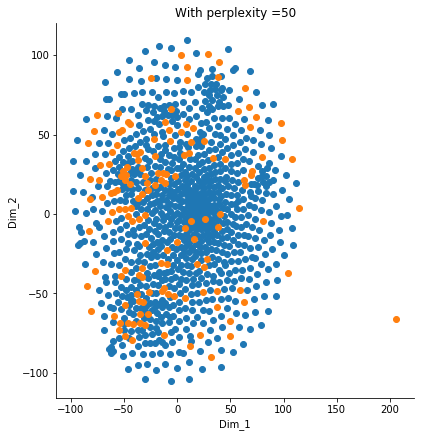

In [91]:
data_1000 = final_counts
labels_1000 =final['Score'].values
model =TSNE(n_components=2,random_state=0)
tsne_data = model.fit_transform(data_1000.toarray())

tsne_data1 =np.vstack((tsne_data.T,labels_1000)).T
tsne_df = pd.DataFrame(data =tsne_data1, columns=("Dim_1","Dim_2","labels"))

sns.FacetGrid(tsne_df, hue="labels", size=6).map(plt.scatter,'Dim_1','Dim_2')
plt.title('With perplexity =50')
plt.show()

C:\Users\hp\OneDrive\anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


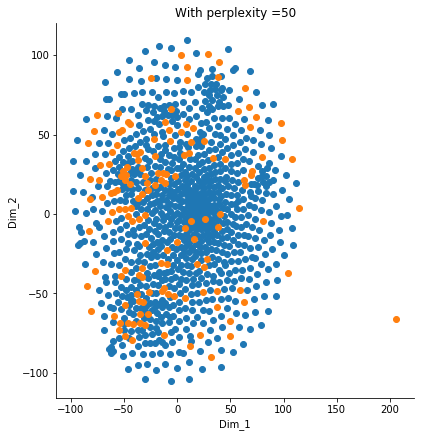

In [92]:
sns.FacetGrid(tsne_df, hue="labels", size=6).map(plt.scatter,'Dim_1','Dim_2')
plt.title('With perplexity =50')
plt.show()

C:\Users\hp\OneDrive\anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


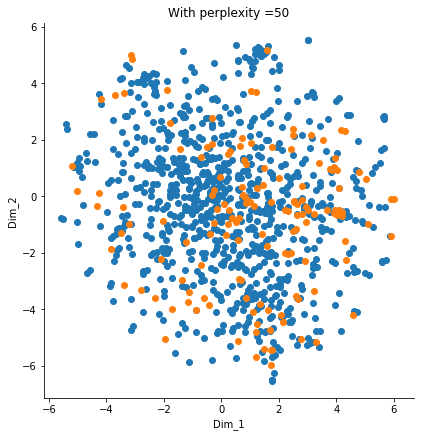

In [93]:
model =TSNE(n_components=2,random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_1000.toarray())

tsne_data1 =np.vstack((tsne_data.T,labels_1000)).T
tsne_df = pd.DataFrame(data =tsne_data1, columns=("Dim_1","Dim_2","labels"))

sns.FacetGrid(tsne_df, hue="labels", size=6).map(plt.scatter,'Dim_1','Dim_2')
plt.title('With perplexity =50')
plt.show()

C:\Users\hp\OneDrive\anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


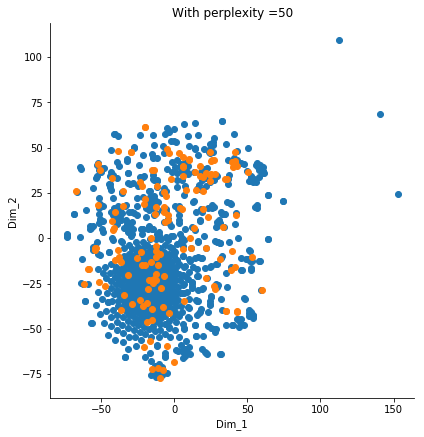

In [94]:
model =TSNE(n_components=2,random_state=0, perplexity=2)
tsne_data = model.fit_transform(data_1000.toarray())

tsne_data1 =np.vstack((tsne_data.T,labels_1000)).T
tsne_df = pd.DataFrame(data =tsne_data1, columns=("Dim_1","Dim_2","labels"))

sns.FacetGrid(tsne_df, hue="labels", size=6).map(plt.scatter,'Dim_1','Dim_2')
plt.title('With perplexity =50')
plt.show()

<h2> TF_IDF </h2>

In [95]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
tf_idf_vect.fit(preprocessed_reviews)
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print('='*50)

final_tf_idf = tf_idf_vect.transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

('some sample features(unique words in the corpus)', [u'able', u'absolutely', u'actually', u'add', u'added', u'addicted', u'aftertaste', u'agave', u'ago', u'allergies'])
('the type of count vectorizer ', <class 'scipy.sparse.csr.csr_matrix'>)
('the shape of out text TFIDF vectorizer ', (998, 694))
('the number of unique words including both unigrams and bigrams ', 694)


<h2> Applying T_SNE in TF_IDF </h2>

C:\Users\hp\OneDrive\anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


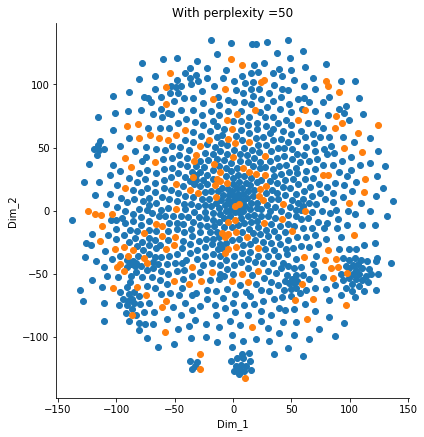

In [96]:
data_1000 = final_tf_idf
labels_1000 =final['Score'].values
model =TSNE(n_components=2,random_state=0)
tsne_data = model.fit_transform(data_1000.toarray())

tsne_data1 =np.vstack((tsne_data.T,labels_1000)).T
tsne_df = pd.DataFrame(data =tsne_data1, columns=("Dim_1","Dim_2","labels"))

sns.FacetGrid(tsne_df, hue="labels", size=6).map(plt.scatter,'Dim_1','Dim_2')
plt.title('With perplexity =50')
plt.show()

C:\Users\hp\OneDrive\anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


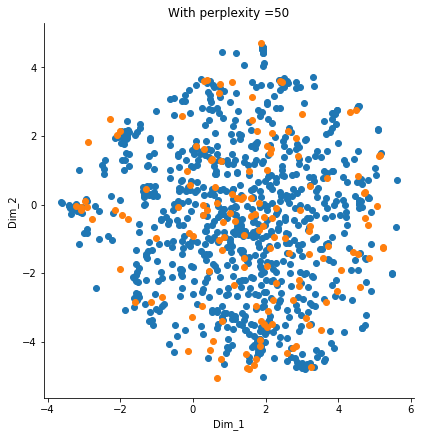

In [97]:
data_1000 = final_tf_idf
labels_1000 =final['Score'].values
model =TSNE(n_components=2,random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_1000.toarray())

tsne_data1 =np.vstack((tsne_data.T,labels_1000)).T
tsne_df = pd.DataFrame(data =tsne_data1, columns=("Dim_1","Dim_2","labels"))

sns.FacetGrid(tsne_df, hue="labels", size=6).map(plt.scatter,'Dim_1','Dim_2')
plt.title('With perplexity =50')
plt.show()

C:\Users\hp\OneDrive\anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


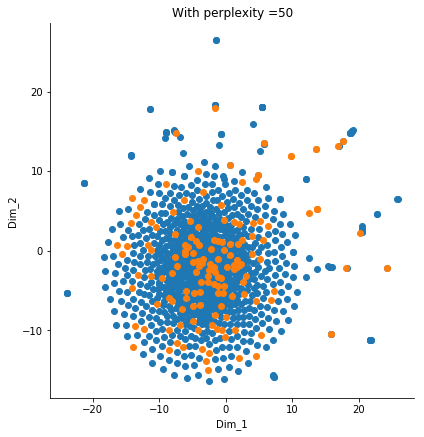

In [98]:
data_1000 = final_tf_idf
labels_1000 =final['Score'].values
model =TSNE(n_components=2,random_state=0, perplexity=2)
tsne_data = model.fit_transform(data_1000.toarray())

tsne_data1 =np.vstack((tsne_data.T,labels_1000)).T
tsne_df = pd.DataFrame(data =tsne_data1, columns=("Dim_1","Dim_2","labels"))

sns.FacetGrid(tsne_df, hue="labels", size=6).map(plt.scatter,'Dim_1','Dim_2')
plt.title('With perplexity =50')
plt.show()

<h2> Word2Vec </h2>

In [99]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer


stop = set(stopwords.words('english'))
sno = nltk.stem.SnowballStemmer('english')


def cleanhtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

def cleanpunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/|]',r' ',cleaned)
    return cleaned

print(stop)
print('******************************************')
print(sno.stem('tasty'))

    
# what is the errror you are getting?
    
    
    
    

set([u'all', u'just', u"don't", u'being', u'over', u'both', u'through', u'yourselves', u'its', u'before', u'o', u'don', u'hadn', u'herself', u'll', u'had', u'should', u'to', u'only', u'won', u'under', u'ours', u'has', u"should've", u"haven't", u'do', u'them', u'his', u'very', u"you've", u'they', u'not', u'during', u'now', u'him', u'nor', u"wasn't", u'd', u'did', u'didn', u'this', u'she', u'each', u'further', u"won't", u'where', u"mustn't", u"isn't", u'few', u'because', u"you'd", u'doing', u'some', u'hasn', u"hasn't", u'are', u'our', u'ourselves', u'out', u'what', u'for', u"needn't", u'below', u're', u'does', u"shouldn't", u'above', u'between', u'mustn', u't', u'be', u'we', u'who', u"mightn't", u"doesn't", u'were', u'here', u'shouldn', u'hers', u"aren't", u'by', u'on', u'about', u'couldn', u'of', u"wouldn't", u'against', u's', u'isn', u'or', u'own', u'into', u'yourself', u'down', u"hadn't", u'mightn', u"couldn't", u'wasn', u'your', u"you're", u'from', u'her', u'their', u'aren', u"it's",

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [100]:
i=0
str1=''
final_string=[]
all_positive_words=[]
all_negative_words=[]
s=''
for sent in final['Text'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Score'].values)[i] == 'positive':
                        all_positive_words.append(s)
                    if (final['Score'].values)[i] == 'negative':
                        all_negative_words.append(s)
                    else:
                        continue
                else:
                    continue
    str1 = b" ".join(filtered_sentence)
   # print("***********************************************************************888")
    final_string.append(str1)
    i+=1
                
                
                

In [101]:
final['CleanedText']=final_string

In [102]:
final.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,Positive,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,dont know cactus tequila uniqu combin ingredi ...
252,253,B0002567IW,A1SSKFPX72MSMR,"Janna M. Sicard ""missjanna""",0,0,Negative,1344556800,Sad outcome,"Five minutes in, one tentacle was bitten off, ...",five minut one tentacl bitten ball insid crack...
187,188,B00029XIZI,A2S72TUJDQUBMH,Nadia,0,0,Positive,1236124800,Miracle,My Scotties were full of hot spots and when I ...,scotti full hot spot use within week hot spot ...


In [103]:
import gensim
from gensim.models import word2vec
from gensim.models import keyedvectors
import pickle
#import gensim


i=0
list_of_sent=[]
for sent in final['Text'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue
    list_of_sent.append(filtered_sentence) # sir till its working what is wrong with this code now

In [104]:
print(final['Text'].values[0])
print("***********************************************************************************")
print(list_of_sent[0])
# conda install gensim 
#sir are you there ? 
#???

I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!
***********************************************************************************
['i', 'dont', 'know', 'if', 'its', 'the', 'cactus', 'or', 'the', 'tequila', 'or', 'just', 'the', 'unique', 'combination', 'of', 'ingredi

In [105]:
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,size=50, workers=4)

C:\Users\hp\OneDrive\anaconda\lib\site-packages\gensim\models\base_any2vec.py:323: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [106]:
w2v_words = list(w2v_model.wv.vocab)                

In [107]:
sent_vectors = [];
for sent in tqdm(list_of_sent):
    sent_vec = np.zeros(50)
    cnt_words =0;
    for word in sent:
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))
    
    

100%|███████████████████████████████████████████████████████████████████████████████| 998/998 [00:01<00:00, 522.24it/s]


998
50


<h2> Applying T_SNE In Word2Vec </h2>

C:\Users\hp\OneDrive\anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


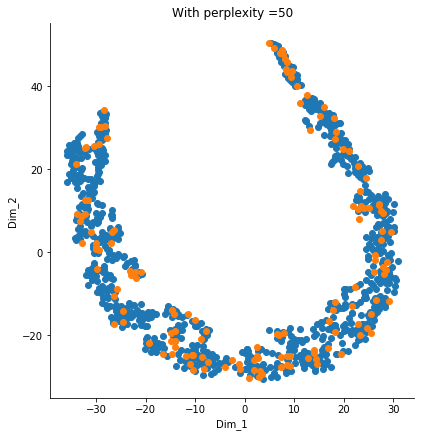

In [108]:
data_1000 = sent_vectors
labels_1000 =final['Score'].values
model =TSNE(n_components=2,random_state=0)
tsne_data = model.fit_transform(data_1000)

tsne_data1 =np.vstack((tsne_data.T,labels_1000)).T
tsne_df = pd.DataFrame(data =tsne_data1, columns=("Dim_1","Dim_2","labels"))

sns.FacetGrid(tsne_df, hue="labels", size=6).map(plt.scatter,'Dim_1','Dim_2')
plt.title('With perplexity =50')
plt.show()

C:\Users\hp\OneDrive\anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


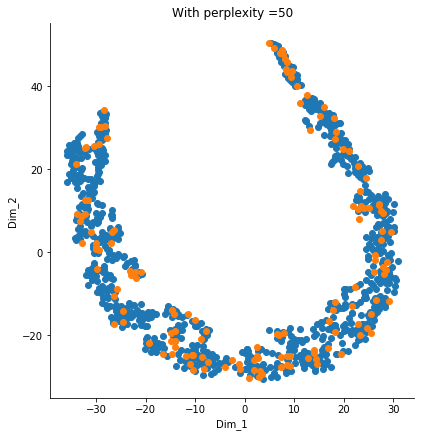

In [109]:
sns.FacetGrid(tsne_df, hue="labels", size=6).map(plt.scatter,'Dim_1','Dim_2')
plt.title('With perplexity =50')
plt.show()

<h2> Avg Word2Vec </h2>

In [110]:
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(final['CleanedText'].values)

dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))


tfidf_feat = model.get_feature_names()
tfidf_sent_vectors = [];
row=0;
for sent in tqdm(list_of_sent):
    sent_vec = np.zeros(50)
    weight_sum =0;
    for word in sent:
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))  
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1
    
   # print(len(tfidf_sent_vectors))

100%|████████████████████████████████████████████████████████████████████████████████| 998/998 [01:02<00:00, 11.66it/s]


<h2> Applying T_SNE In AvgWord2Vec </h2>

C:\Users\hp\OneDrive\anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


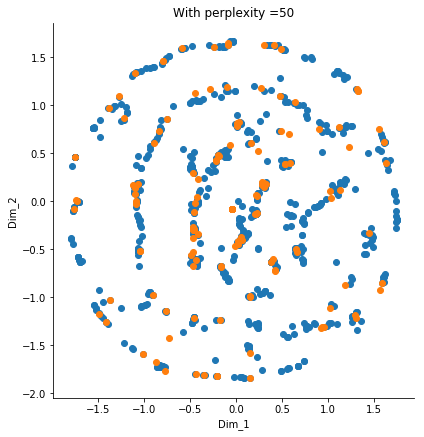

In [111]:
data_1000 = tfidf_sent_vectors
labels_1000 =final['Score'].values
model =TSNE(n_components=2,random_state=0)
tsne_data = model.fit_transform(data_1000)

tsne_data1 =np.vstack((tsne_data.T,labels_1000)).T
tsne_df = pd.DataFrame(data =tsne_data1, columns=("Dim_1","Dim_2","labels"))

sns.FacetGrid(tsne_df, hue="labels", size=6).map(plt.scatter,'Dim_1','Dim_2')
plt.title('With perplexity =50')
plt.show()

C:\Users\hp\OneDrive\anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


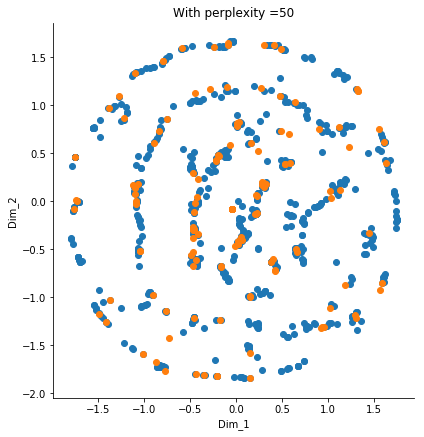

In [112]:
sns.FacetGrid(tsne_df, hue="labels", size=6).map(plt.scatter,'Dim_1','Dim_2')
plt.title('With perplexity =50')
plt.show()